


> **URL Classification**




**Problem Statement**

Web page classification has become a challenging task due to the exponential growth of the World Wide Web. As a result, high accuracy may not be achievable as URL contains minimal information. Further, noisy and irrelevant features present in URL demand feature selection methods for URL classification. Therefore, a technique will be robust to irrelevant features and will generalize the classification for wide range of websites.


Imports

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from collections import Counter
from tqdm import tqdm
from random import random, choices, shuffle, randint
from keras import Sequential
from keras.layers import Dense


Mounting to Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Changing the Directory


In [0]:
cd gdrive/"My Drive"/LY/DWM/IA2

/content/gdrive/My Drive/LY/DWM/IA2


Loading the Dataset

In [0]:
names = ["Category","Title","Description"]
dataset = pd.read_csv("dataset.csv",names=names, na_filter=False)[1:]     

**Preprocessing**

Histogram of Categories

Text(0, 0.5, 'Total Number Of Individual Category for Training')

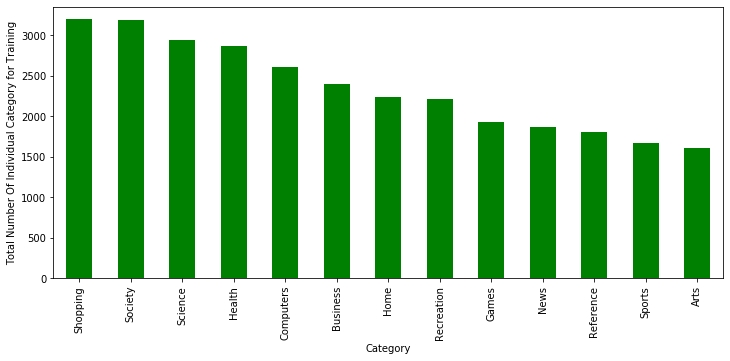

In [0]:
dataset.Category.value_counts().plot(figsize=(12,5),kind='bar',color='green');
plt.xlabel('Category')
plt.ylabel('Total Number Of Individual Category for Training')

Removing all the unnecessary characters, converting the words to root form and converting them Vector form

In [0]:
#Getting input and output from the dataframe and converting them to list
X = dataset[names[1:]].values.tolist()
Y = dataset[names[0]].values.tolist()

X1 = dataset[names[1:]].values.tolist()
Y1 = dataset[names[0]].values.tolist()


#Storing all preprocessing data
corpus = []


for i in tqdm(range(len(dataset)), position=0, leave=True):

    #Removing all non-alphabetical characters
    review = re.sub('[^a-zA-Z]', ' ', X[i][0]+" "+X[i][1])

    #Converting to lower case
    review = review.lower()

    #Splitting the words
    review = review.split()

    #Converting all the words to their root form
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

    #Joining the words again
    review = ' '.join(review)
    corpus.append(review)


#Vectorizing the input
cv_x = CountVectorizer(max_features=25000)
X = np.array(cv_x.fit_transform(corpus).toarray())
X_feature_names = cv_x.get_feature_names()

#Vectorizing the output
cv_y = CountVectorizer()
Y = np.array(cv_y.fit_transform(Y).toarray())
Y_feature_names = cv_y.get_feature_names()

100%|██████████| 30550/30550 [01:30<00:00, 336.88it/s]


Train-Test split

In [0]:
#80-20 Train Test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

**Training**

Initializing the model

In [0]:
model=Sequential()
model.add(Dense(50,input_shape=(len(X_feature_names),),activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(len(Y_feature_names),activation="softmax"))

Compiling and Training

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=5, batch_size=50)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/5





24440/24440 [==============================] - 27s 1ms/step - loss: 0.1336 - acc: 0.9557
Epoch 2/5
24440/24440 [==============================] - 15s 610us/step - loss: 0.0356 - acc: 0.9889
Epoch 3/5
24440/24440 [==============================] - 14s 567us/step - loss: 0.0146 - acc: 0.9961
Epoch 4/5
24440/24440 [==============================] - 14s 556us/step - loss: 0.0067 - acc: 0.9985
Epoch 5/5
24440/24440 [==============================] - 14s 568us/step - loss: 0.0033 - acc: 0.9994


**Testing**

In [0]:
prediction = model.predict(X_test)
y_test = np.argmax(Y_test,axis=1)
y_pred = np.argmax(prediction,axis=1)

Accuracy Check

In [0]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy*100)

86.07201309328968


Confusion Matrix

In [0]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(np.unique(dataset[names[0]].values.tolist()))
print(confusion_matrix)

['Arts' 'Business' 'Computers' 'Games' 'Health' 'Home' 'News' 'Recreation'
 'Reference' 'Science' 'Shopping' 'Society' 'Sports']
[[264   1   6   5   2   3   2   2   1   0   2   5   4]
 [  1 400   7   0   2   4   1   2   3  26   9   5   1]
 [  1   8 427   2   2   3   8   1  14  13   3   5   2]
 [  3   6   5 333   1   2   2   4   8   3   6   0   8]
 [  2   0   2   3 543   1   6   1   9   7   1  18   0]
 [  1   5   1   4   8 370   1  10   6  11   9  19   1]
 [  2   3   9   0   3   3 332   6   7   6   2  23   2]
 [  1   0   5   6   3  18   7 404   4   3  26   3   2]
 [  0   1  20   1   6   7   9   3 288  11   4  11   0]
 [  0  18  17   3   5   8   5   6  10 526   1  11   0]
 [  5   1   3   7   2  10   4  18   4   1 569   5   1]
 [  4   8   8   1  22  14  15  14  16  10   6 503   5]
 [  2   0   3   8   2   0   4   5   0   1   3   8 300]]


**Demo**

In [0]:
n = randint(0,len(X)-1)
print("Input:-")
print("Title, Description")
print(X1[n])
prediction = np.argmax(model.predict(np.array([X[n]])), axis=1)[0]
print("")
print("Prediction:-")
print(Y_feature_names[prediction])
print("")
print("Actual:-")
print(Y1[n])


Input:-
Title, Description
['Euchre', 'Books, links, decks, software and online play information.']

Prediction:-
games

Actual:-
Games


In [0]:
def get(X,X_feature_names):
  corpus = []



  #Removing all non-alphabetical characters
  review = re.sub('[^a-zA-Z]', ' ', X[0]+" "+X[1])
  #Converting to lower case
  review = review.lower()

  #Splitting the words
  review = review.split()

  #Converting all the words to their root form
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

  #Joining the words again
  review = ' '.join(review)
  corpus.append(review)
  corpus = list(corpus[0].split())

  X = [0 for i in range(len(X_feature_names))]
  for i in range(len(corpus)):
    if corpus[i] in X_feature_names:
      X[X_feature_names.index(corpus[i])]+=1
  

  
  return np.array([X])


print("Enter Input:-")
print("Title, Description")
title = input()
description = input()
prediction = np.argmax(model.predict(get([title,description],X_feature_names)), axis=1)[0]
print("")
print("Prediction:-")
print(Y_feature_names[prediction])


Enter Input:-
Title, Description
Cold diagnosis method
This paper for fever, cancer, health related problems

Prediction:-
health
